In [1]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.max_rows', 500)
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

In [2]:
df=pd.read_csv("df_final_short_A.csv")
df=df.drop(["GCSmin","Patient"],axis=1)

df_A=pd.read_csv("df_final_short_A.csv")
df_B=pd.read_csv("df_final_short_B.csv")

Text(0, 0.5, 'count')

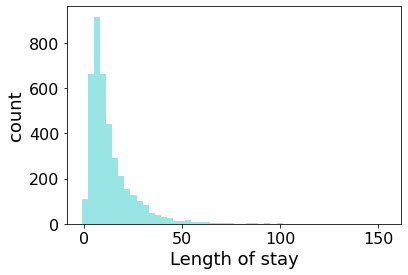

In [3]:
sns.distplot(df.Length_of_staymean,kde=False,color='c')
plt.xlabel("Length of stay")
plt.ylabel("count")

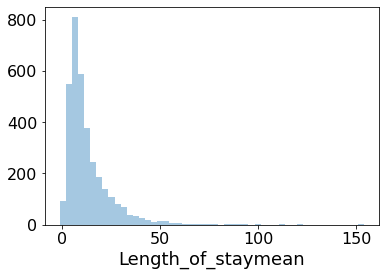

In [4]:
sns.distplot(df.Length_of_staymean[df["In-hospital_deathmax"]==0],kde=False)

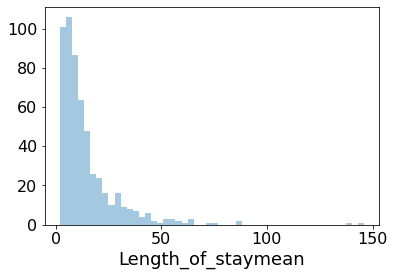

In [5]:
sns.distplot(df.Length_of_staymean[df["In-hospital_deathmax"]==1],kde=False)

In [6]:
df.head()

ALPmedian  ALTmedian  ASTmedian  Albuminmedian  BUNmedian  Bilirubinmedian  \
0   0.044325   0.002832   0.002552       0.452381   0.048711         0.013100   
1   0.044325   0.002832   0.002552       0.452381   0.091691         0.013100   
2   0.069846   0.008091   0.012345       0.333333   0.005731         0.061135   
3   0.062458   0.000910   0.000574       0.785714   0.103152         0.002183   
4   0.044325   0.002832   0.002552       0.523810   0.189112         0.013100   

   Cholesterolmedian  Creatininemedian  FiO2median  Glucosemedian  HCO3median  \
0           0.413907          0.034591    0.305556       0.252273    0.487179   
1           0.413907          0.062893    0.305556       0.173864    0.358974   
2           0.413907          0.006289    0.305556       0.209091    0.435897   
3           0.413907          0.031447    0.305556       0.154545    0.512821   
4           0.413907          0.050314    0.305556       0.121591    0.282051   

   HCTmedian  HRmedian   Kmedian  Lactatemedian  Mgmedian  Namedian  \
0   0.404324  0.277311  0.333333       0.057732  0.111111  0.450450   
1   0.302703  0.336134  0.274510       0.057732  0.185185  0.459459   
2   0.300541  0.369748  0.176471       0.037113  0.129630  0.477477   
3   0.475676  0.285714  0.294118       0.057732  0.185185  0.513514   
4   0.341622  0.277311  0.274510       0.057732  0.083333  0.504505   

   PaCO2median  PaO2median  Plateletsmedian  RespRatemedian  SaO2median  \
0     0.294118    0.200422         0.211019        0.388889    0.958333   
1     0.305882    0.267932         0.186777        0.416667    0.950000   
2     0.258824    0.199367         0.079890        0.416667    0.916667   
3     0.294118    0.200422         0.334435        0.333333    0.958333   
4     0.294118    0.200422         0.100826        0.416667    0.958333   

   TroponinImedian  TroponinTmedian  WBCmedian  pHmedian  new_Tempmedian  \
0          0.03681          0.00541   0.072495  0.542857          0.6250   
1          0.03681          0.00541   0.092395  0.561905          0.5500   
2          0.03681          0.00541   0.029140  0.752381          0.6625   
3          0.03681          0.00541   0.061834  0.542857          0.3000   
4          0.03681          0.00541   0.029851  0.542857          0.4500   

   PaO2FiO2median  In-hospital_deathmax  new_Heightfirst  new_Weightfirst  \
0        0.242489                     0         0.500894         0.431500   
1        0.242489                     0         0.592129         0.412861   
2        0.242489                     0         0.500894         0.232992   
3        0.242489                     0         0.681574         0.493010   
4        0.242489                     0         0.500894         0.431500   

   Urinemean48h  MeanMAPfirst  MeanDiasABPfirst  MeanSysABPfirst  \
0      0.005457      0.269312          0.385714         0.539906   
1      0.005383      0.167264          0.296429         0.265258   
2      0.004437      0.310326          0.510714         0.509390   
3      0.002837      0.248804          0.371429         0.478873   
4      0.002045      0.207717          0.214286         0.525822   

   Hypertension  Tachycardia  GCSComa  Diabetes  Hyperglycemia  Hypoglycemia  \
0             1            0        0         2              0             0   
1             0            0        0         0              0             0   
2             1            1        1         0              0             0   
3             0            0        0         0              0             0   
4             1            0        0         0              0             0   

   Renal Injury  BMI_Cat  MechVentmax  ICUTypemax  Genderfirst  \
0             0        0          0.0         4.0          0.0   
1             0        0          1.0         2.0          1.0   
2             0        0          1.0         3.0          0.0   
3             0        1          0.0         3.0          1.0   
4          

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997 entries, 0 to 3996
Data columns (total 48 columns):
ALPmedian               3997 non-null float64
ALTmedian               3997 non-null float64
ASTmedian               3997 non-null float64
Albuminmedian           3997 non-null float64
BUNmedian               3997 non-null float64
Bilirubinmedian         3997 non-null float64
Cholesterolmedian       3997 non-null float64
Creatininemedian        3997 non-null float64
FiO2median              3997 non-null float64
Glucosemedian           3997 non-null float64
HCO3median              3997 non-null float64
HCTmedian               3997 non-null float64
HRmedian                3997 non-null float64
Kmedian                 3997 non-null float64
Lactatemedian           3997 non-null float64
Mgmedian                3997 non-null float64
Namedian                3997 non-null float64
PaCO2median             3997 non-null float64
PaO2median              3997 non-null float64
Plateletsmedian    

# T-test

In [8]:
from scipy import stats
stats.ttest_ind(df["Length_of_staymean"][df["In-hospital_deathmax"]==0],
                df["Length_of_staymean"][df["In-hospital_deathmax"]==1])

Ttest_indResult(statistic=-2.1768099004845918, pvalue=0.029553116905477815)

In [9]:
a=df["Length_of_staymean"][df["In-hospital_deathmax"]==0]
b=df["Length_of_staymean"][df["In-hospital_deathmax"]==1]

In [10]:
stats.ks_2samp(df["Length_of_staymean"][df["In-hospital_deathmax"]==0],df["Length_of_staymean"][df["In-hospital_deathmax"]==1])

Ks_2sampResult(statistic=0.0725936870580279, pvalue=0.012449546657567478)

In [11]:
np.sqrt(-np.log(0.05/2)*((1+(len(a)/len(b)))/2))*(1/np.sqrt(len(a)))

0.06221644195988302

Text(0, 0.5, 'Frequency')

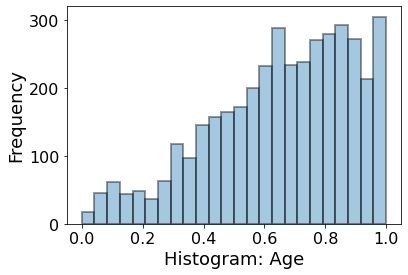

In [12]:
sns.distplot(df.Agemean, kde=False, rug=False, hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel("Histogram: Age")
plt.ylabel("Frequency")

In [13]:
df.columns.values

array(['ALPmedian', 'ALTmedian', 'ASTmedian', 'Albuminmedian',
       'BUNmedian', 'Bilirubinmedian', 'Cholesterolmedian',
       'Creatininemedian', 'FiO2median', 'Glucosemedian', 'HCO3median',
       'HCTmedian', 'HRmedian', 'Kmedian', 'Lactatemedian', 'Mgmedian',
       'Namedian', 'PaCO2median', 'PaO2median', 'Plateletsmedian',
       'RespRatemedian', 'SaO2median', 'TroponinImedian',
       'TroponinTmedian', 'WBCmedian', 'pHmedian', 'new_Tempmedian',
       'PaO2FiO2median', 'In-hospital_deathmax', 'new_Heightfirst',
       'new_Weightfirst', 'Urinemean48h', 'MeanMAPfirst',
       'MeanDiasABPfirst', 'MeanSysABPfirst', 'Hypertension',
       'Tachycardia', 'GCSComa', 'Diabetes', 'Hyperglycemia',
       'Hypoglycemia', 'Renal Injury', 'BMI_Cat', 'MechVentmax',
       'ICUTypemax', 'Genderfirst', 'Length_of_staymean', 'Agemean'],
      dtype=object)

In [14]:
make_category=['In-hospital_deathmax','Hypertension',
'Tachycardia', 'GCSComa', 'Diabetes', 'Hyperglycemia',
'Hypoglycemia', 'Renal Injury', 'BMI_Cat', 'MechVentmax',
'ICUTypemax', 'Genderfirst']

In [15]:
df[make_category]=df[make_category].astype('category')

In [16]:
df_x_train=pd.read_pickle("X_short_A.pkl")
df_x_train["Length_of_staymean"]=df_x_train["Length_of_staymean"].astype('int')

In [17]:
df_x_test=pd.read_pickle("X_short_B.pkl")
df_x_test["Length_of_staymean"]=df_x_test["Length_of_staymean"].astype('int')

In [18]:
df_y_train=pd.read_pickle("y_short_A.pkl")

In [19]:
df_y_test=pd.read_pickle("y_short_B.pkl")

In [20]:
df_train=pd.concat([df_x_train,df_y_train],axis=1)
df_train=df_train.loc[:,df.columns.values]

In [21]:
df_train.head()

ALPmedian  ALTmedian  ASTmedian  Albuminmedian  BUNmedian  Bilirubinmedian  \
0   0.044325   0.002832   0.002552       0.452381   0.048711         0.013100   
1   0.044325   0.002832   0.002552       0.452381   0.091691         0.013100   
2   0.069846   0.008091   0.012345       0.333333   0.005731         0.061135   
3   0.062458   0.000910   0.000574       0.785714   0.103152         0.002183   
4   0.044325   0.002832   0.002552       0.523810   0.189112         0.013100   

   Cholesterolmedian  Creatininemedian  FiO2median  Glucosemedian  HCO3median  \
0           0.413907          0.034591    0.305556       0.252273    0.487179   
1           0.413907          0.062893    0.305556       0.173864    0.358974   
2           0.413907          0.006289    0.305556       0.209091    0.435897   
3           0.413907          0.031447    0.305556       0.154545    0.512821   
4           0.413907          0.050314    0.305556       0.121591    0.282051   

   HCTmedian  HRmedian   Kmedian  Lactatemedian  Mgmedian  Namedian  \
0   0.404324  0.277311  0.333333       0.057732  0.111111  0.450450   
1   0.302703  0.336134  0.274510       0.057732  0.185185  0.459459   
2   0.300541  0.369748  0.176471       0.037113  0.129630  0.477477   
3   0.475676  0.285714  0.294118       0.057732  0.185185  0.513514   
4   0.341622  0.277311  0.274510       0.057732  0.083333  0.504505   

   PaCO2median  PaO2median  Plateletsmedian  RespRatemedian  SaO2median  \
0     0.294118    0.200422         0.211019        0.388889    0.958333   
1     0.305882    0.267932         0.186777        0.416667    0.950000   
2     0.258824    0.199367         0.079890        0.416667    0.916667   
3     0.294118    0.200422         0.334435        0.333333    0.958333   
4     0.294118    0.200422         0.100826        0.416667    0.958333   

   TroponinImedian  TroponinTmedian  WBCmedian  pHmedian  new_Tempmedian  \
0          0.03681          0.00541   0.072495  0.542857          0.6250   
1          0.03681          0.00541   0.092395  0.561905          0.5500   
2          0.03681          0.00541   0.029140  0.752381          0.6625   
3          0.03681          0.00541   0.061834  0.542857          0.3000   
4          0.03681          0.00541   0.029851  0.542857          0.4500   

   PaO2FiO2median In-hospital_deathmax  new_Heightfirst  new_Weightfirst  \
0        0.242489                    0         0.500894         0.431500   
1        0.242489                    0         0.592129         0.412861   
2        0.242489                    0         0.500894         0.232992   
3        0.242489                    0         0.681574         0.493010   
4        0.242489                    0         0.500894         0.431500   

   Urinemean48h  MeanMAPfirst  MeanDiasABPfirst  MeanSysABPfirst Hypertension  \
0      0.005457      0.269312          0.385714         0.539906            1   
1      0.005383      0.167264          0.296429         0.265258            0   
2      0.004437      0.310326          0.510714         0.509390            1   
3      0.002837      0.248804          0.371429         0.478873            0   
4      0.002045      0.207717          0.214286         0.525822            1   

  Tachycardia GCSComa Diabetes Hyperglycemia Hypoglycemia Renal Injury  \
0           0       0        2             0            0            0   
1           0       0        0             0            0            0   
2           1       1        0             0            0            0   
3           0       0        0             0            0            0   
4           0       0        0             0            0            0   

  BMI_Cat MechVentmax ICUTypemax Genderfirst  Length_of_staymean   Agemean  
0       0         0.0        4.0         0.0                   5  0.520000  
1       0         1.0        2.0         1.0                   8  0.813333  
2       0         1.0        3.0         0.0                  19  0.386667

In [22]:
df_train=df_train[df_train["Length_of_staymean"]>0]

In [23]:
df_train

ALPmedian  ALTmedian  ASTmedian  Albuminmedian  BUNmedian  \
0      0.044325   0.002832   0.002552       0.452381   0.048711   
1      0.044325   0.002832   0.002552       0.452381   0.091691   
2      0.069846   0.008091   0.012345       0.333333   0.005731   
3      0.062458   0.000910   0.000574       0.785714   0.103152   
4      0.044325   0.002832   0.002552       0.523810   0.189112   
...         ...        ...        ...            ...        ...   
3992   0.044325   0.002832   0.002552       0.452381   0.080229   
3993   0.044325   0.002832   0.002552       0.452381   0.011461   
3994   0.026192   0.001719   0.000893       0.452381   0.031519   
3995   0.108126   0.205624   0.110693       0.476190   0.498567   
3996   0.021491   0.001568   0.007656       0.261905   0.100287   

      Bilirubinmedian  Cholesterolmedian  Creatininemedian  FiO2median  \
0            0.013100           0.413907          0.034591    0.305556   
1            0.013100           0.413907          0.062893    0.305556   
2            0.061135           0.413907          0.006289    0.305556   
3            0.002183           0.413907          0.031447    0.305556   
4            0.013100           0.413907          0.050314    0.305556   
...               ...                ...               ...         ...   
3992         0.013100           0.413907          0.044025    0.166667   
3993         0.013100           0.294702          0.044025    0.305556   
3994         0.008734           0.413907          0.059748    0.166667   
3995         0.013100           0.413907          0.594340    0.305556   
3996         0.010917           0.413907          0.050314    0.305556   

      Glucosemedian  HCO3median  HCTmedian  HRmedian   Kmedian  Lactatemedian  \
0          0.252273    0.487179   0.404324  0.277311  0.333333       0.057732   
1          0.173864    0.358974   0.302703  0.336134  0.274510       0.057732   
2          0.209091    0.435897   0.300541  0.369748  0.176471       0.037113   
3          0.154545    0.512821   0.475676  0.285714  0.294118       0.057732   
4          0.121591    0.282051   0.341622  0.277311  0.274510       0.057732   
...             ...         ...        ...       ...       ...            ...   
3992       0.163636    0.346154   0.308108  0.508403  0.264706       0.078351   
3993       0.106818    0.384615   0.367568  0.327731  0.235294       0.057732   
3994       0.113636    0.435897   0.514595  0.453782  0.254902       0.057732   
3995       0.184091    0.500000   0.303784  0.403361  0.441176       0.061856   
3996       0.175000    0.282051   0.424865  0.411765  0.470588       0.090722   

      Mgmedian  Namedian  PaCO2median  PaO2median  Plateletsmedian  \
0     0.111111  0.450450     0.294118    0.200422         0.211019   
1     0.185185  0.459459     0.305882    0.267932         0.186777   
2     0.129630  0.477477     0.258824    0.199367         0.079890   
3     0.185185  0.513514     0.294118    0.200422         0.334435   
4     0.083333  0.504505     0.294118    0.200422         0.100826   
...        ...       ...          ...         ...              ...   
3992  0.111111  0.441441     0.305882    0.240506         0.216529   
3993  0.074074  0.531532     0.294118    0.200422         0.117355   
3994  0.250000  0.531532     0.352941    0.213080         0.236364   
3995  0.314815  0.585586     0.352941    0.301688         0.351515   
3996  0.240741  0.585586     0.294118    0.206751         0.101928   

      RespRatemedian  SaO2median  TroponinImedian  TroponinTmedian  WBCmedian  \
0           0.388889    0.958333          0.03681          0.00541   0.072495   
1           0.416667    0.950000          0.03681          0.00541   0.092395   
2           0.416667    0.916667          0.03681          0.00541   0.029140   
3           0.333333    0.958333          0.03681          0.00541   0.061834   
4           0.416667    0.958333          0.03681          0.00541   0.029851   
...         

In [24]:
df_test=pd.concat([df_x_test,df_y_test],axis=1)
df_test=df_test.loc[:,df.columns]

In [25]:
df_test=df_test[df_test["Length_of_staymean"]>0]

# Get dummies 

In [26]:
dummies=pd.get_dummies(df_train[make_category],drop_first=True)
df_train=df_train.drop(make_category,axis=1).join(dummies)

In [27]:
dummies_test=pd.get_dummies(df_test[make_category],drop_first=True)
df_test=df_test.drop(make_category,axis=1).join(dummies_test)

In [28]:
df_train.columns.values

array(['ALPmedian', 'ALTmedian', 'ASTmedian', 'Albuminmedian',
       'BUNmedian', 'Bilirubinmedian', 'Cholesterolmedian',
       'Creatininemedian', 'FiO2median', 'Glucosemedian', 'HCO3median',
       'HCTmedian', 'HRmedian', 'Kmedian', 'Lactatemedian', 'Mgmedian',
       'Namedian', 'PaCO2median', 'PaO2median', 'Plateletsmedian',
       'RespRatemedian', 'SaO2median', 'TroponinImedian',
       'TroponinTmedian', 'WBCmedian', 'pHmedian', 'new_Tempmedian',
       'PaO2FiO2median', 'new_Heightfirst', 'new_Weightfirst',
       'Urinemean48h', 'MeanMAPfirst', 'MeanDiasABPfirst',
       'MeanSysABPfirst', 'Length_of_staymean', 'Agemean',
       'In-hospital_deathmax_1', 'Hypertension_1', 'Tachycardia_1',
       'GCSComa_1', 'Diabetes_1', 'Diabetes_2', 'Hyperglycemia_1',
       'Hypoglycemia_1', 'Renal Injury_1', 'BMI_Cat_0', 'BMI_Cat_1',
       'BMI_Cat_2', 'MechVentmax_1.0', 'ICUTypemax_2.0', 'ICUTypemax_3.0',
       'ICUTypemax_4.0', 'Genderfirst_1.0'], dtype=object)

# First try

In [29]:
cph = CoxPHFitter()
cph.fit(df_train,"Length_of_staymean","In-hospital_deathmax_1")

<lifelines.CoxPHFitter: fitted with 3937 total observations, 3384 right-censored observations>

## Check VIF if you encounter convergence error in cph

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [31]:
# make_category2=["Patient",'Survival','Hypertension','Tachypnea', 'ICUType',"diabetes",
#                'Tachycardia', 'comaGCS', 'hyperglycemia','hypoglycemia', 'Renalinjury',"In-hospital_death"]

In [32]:
df_vif=df_train[df_train.columns.difference(df_train.select_dtypes('uint8'))]

In [33]:
X = add_constant(df_vif)

C:\Users\Alvin\Anaconda3\envs\Survival\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
q=pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns);q

const                     1187.965595
ALPmedian                    1.152341
ALTmedian                    3.447586
ASTmedian                    3.824941
Agemean                      1.432694
Albuminmedian                1.221114
BMI_Cat_0                   15.895670
BMI_Cat_1                   11.352258
BMI_Cat_2                   11.297941
BUNmedian                    2.666976
Bilirubinmedian              1.238756
Cholesterolmedian            1.031442
Creatininemedian             2.589542
Diabetes_1                   1.127425
Diabetes_2                   2.327218
FiO2median                   1.109755
GCSComa_1                    1.165049
Genderfirst_1.0              1.477630
Glucosemedian                1.813108
HCO3median                   2.913065
HCTmedian                    1.254828
HRmedian                     1.845394
Hyperglycemia_1              1.840990
Hypertension_1               2.371018
Hypoglycemia_1               1.034762
ICUTypemax_2.0               2.690998
ICUTypemax_3

In [35]:
#Choose vif values <100
vif_value=100
variable_in=q[q<vif_value].index;variable_in

Index(['ALPmedian', 'ALTmedian', 'ASTmedian', 'Agemean', 'Albuminmedian',
       'BMI_Cat_0', 'BMI_Cat_1', 'BMI_Cat_2', 'BUNmedian', 'Bilirubinmedian',
       'Cholesterolmedian', 'Creatininemedian', 'Diabetes_1', 'Diabetes_2',
       'FiO2median', 'GCSComa_1', 'Genderfirst_1.0', 'Glucosemedian',
       'HCO3median', 'HCTmedian', 'HRmedian', 'Hyperglycemia_1',
       'Hypertension_1', 'Hypoglycemia_1', 'ICUTypemax_2.0', 'ICUTypemax_3.0',
       'ICUTypemax_4.0', 'In-hospital_deathmax_1', 'Kmedian', 'Lactatemedian',
       'Length_of_staymean', 'MeanDiasABPfirst', 'MeanMAPfirst',
       'MeanSysABPfirst', 'MechVentmax_1.0', 'Mgmedian', 'Namedian',
       'PaCO2median', 'PaO2FiO2median', 'PaO2median', 'Plateletsmedian',
       'Renal Injury_1', 'RespRatemedian', 'SaO2median', 'Tachycardia_1',
       'TroponinImedian', 'TroponinTmedian', 'Urinemean48h', 'WBCmedian',
       'new_Heightfirst', 'new_Tempmedian', 'new_Weightfirst', 'pHmedian'],
      dtype='object')

In [36]:
variable_out=q[q>vif_value].index;variable_out

Index(['const'], dtype='object')

# End of VIF check

In [37]:
cph.print_summary()

In [38]:
cph.summary.to_csv("cph_summary_A.csv")

In [39]:
cph.concordance_index_

0.77579297738962

In [40]:
df_cph=cph.summary
df_cph

coef  exp(coef)    se(coef)  coef lower 95%  \
ALPmedian           1.239942   3.455412    0.629139        0.006851   
ALTmedian           2.151364   8.596574    1.838438       -1.451909   
ASTmedian          -3.503305   0.030098    1.832758       -7.095445   
Albuminmedian      -0.210899   0.809856    0.439813       -1.072918   
BUNmedian           1.265211   3.543841    0.433564        0.415442   
Bilirubinmedian     0.897786   2.454163    0.376612        0.159639   
Cholesterolmedian  -0.162005   0.850437    1.129943       -2.376652   
Creatininemedian   -1.405547   0.245233    0.738456       -2.852895   
FiO2median          0.495036   1.640557    0.235494        0.033477   
Glucosemedian       0.470971   1.601548    0.558096       -0.622877   
HCO3median         -1.186677   0.305234    0.747392       -2.651538   
HCTmedian           0.883369   2.419035    0.506106       -0.108580   
HRmedian            1.219244   3.384629    0.418497        0.399005   
Kmedian             0.410713   1.507893    0.524522       -0.617330   
Lactatemedian       3.752366  42.621803    0.675488        2.428433   
Mgmedian            1.215718   3.372716    0.773602       -0.300515   
Namedian           -0.370566   0.690343    0.544205       -1.437188   
PaCO2median         1.066935   2.906457    0.971181       -0.836545   
PaO2median         -0.501614   0.605553    0.556563       -1.592458   
Plateletsmedian    -0.686968   0.503099    0.390587       -1.452505   
RespRatemedian      1.453570   4.278363    0.828751       -0.170751   
SaO2median          0.471204   1.601922    0.790088       -1.077340   
TroponinImedian     1.686777   5.402043    0.538578        0.631184   
TroponinTmedian     1.825188   6.203964    0.639032        0.572709   
WBCmedian           2.101916   8.181830    0.780844        0.571491   
pHmedian            1.561799   4.767391    0.610533        0.365176   
new_Tempmedian     -1.216686   0.296210    0.345946       -1.894728   
PaO2FiO2median      0.312223   1.366460    0.856287       -1.366069   
new_Heightfirst     0.051298   1.052636    0.394753       -0.722405   
new_Weightfirst    -0.959046   0.383258    0.341811       -1.628983   
Urinemean48h        0.743912   2.104150    1.044783       -1.303826   
MeanMAPfirst        1.241009   3.459101    0.896621       -0.516336   
MeanDiasABPfirst   -1.704422   0.181877    0.642058       -2.962833   
MeanSysABPfirst     0.803195   2.232662    0.671053       -0.512046   
Agemean             1.925679   6.859804    0.247419        1.440746   
Hypertension_1      0.193738   1.213779    0.156620       -0.113231   
Tachycardia_1       0.004895   1.004907    0.124335       -0.238798   
GCSComa_1           1.019431   2.771618    0.123386        0.777599   
Diabetes_1          0.485746   1.625387    0.138507        0.214278   
Diabetes_2          0.049570   1.050819    0.146909       -0.238366   
Hyperglycemia_1     0.150735   1.162689    0.157313       -0.157593   
Hypoglycemia_1    -13.380313   0.000002  724.179000    -1432.745071   
Renal Injury_1      0.270961   1.311224    0.153312       -0.029525   
BMI_Cat_0          -0.429690   0.650711    0.295795       -1.009437   
BMI_Cat_1          -0.503680   0.604303    0.316283       -1.123584   
BMI_Cat_2          -0.233411   0.791828    0.338347       -0.896560   
MechVentmax_1.0     0.206058   1.228825    0.116357       -0.021997   
ICUTypemax_2.0     -1.171926   0.309770    0.212420       -1.588261   
ICUTypemax_3.0      0.177131   1.193787    0.144851       -0.106771   
ICUTypemax_4.0     -0.085138   0.918386    0.156045       -0.390980   
Genderfirst_1.0    -0.008785   0.991254    0.104132       -0.212879   

                   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
ALPmedian                2.473032             1.006875            11.858352   
ALTmedian                5.754637             0.234123           315.650867   
ASTmedian                0.088835             0.000829             1.092900   
Albuminmedian  

In [41]:
df_cph_varimp =df_cph.reset_index()
df_cph_varimp=df_cph_varimp.loc[:,["index","-log2(p)"]]

In [42]:
df_cph_varimp=df_cph_varimp.sort_values(by="-log2(p)",ascending=False)
df_cph_varimp=df_cph_varimp.iloc[:20,:]
df_cph_varimp

index   -log2(p)
37         GCSComa_1  52.633943
34           Agemean  47.005410
14     Lactatemedian  25.102691
47    ICUTypemax_2.0  24.789748
26    new_Tempmedian  11.161795
38        Diabetes_1  11.107732
22   TroponinImedian   9.169410
4          BUNmedian   8.149814
12          HRmedian   8.127717
23   TroponinTmedian   7.865564
29   new_Weightfirst   7.638242
24         WBCmedian   7.136822
32  MeanDiasABPfirst   6.976692
25          pHmedian   6.570051
5    Bilirubinmedian   5.867102
8         FiO2median   4.814298
0          ALPmedian   4.358732
2          ASTmedian   4.159945
7   Creatininemedian   4.133050
46   MechVentmax_1.0   3.706982

Text(0, 0.5, ' ')

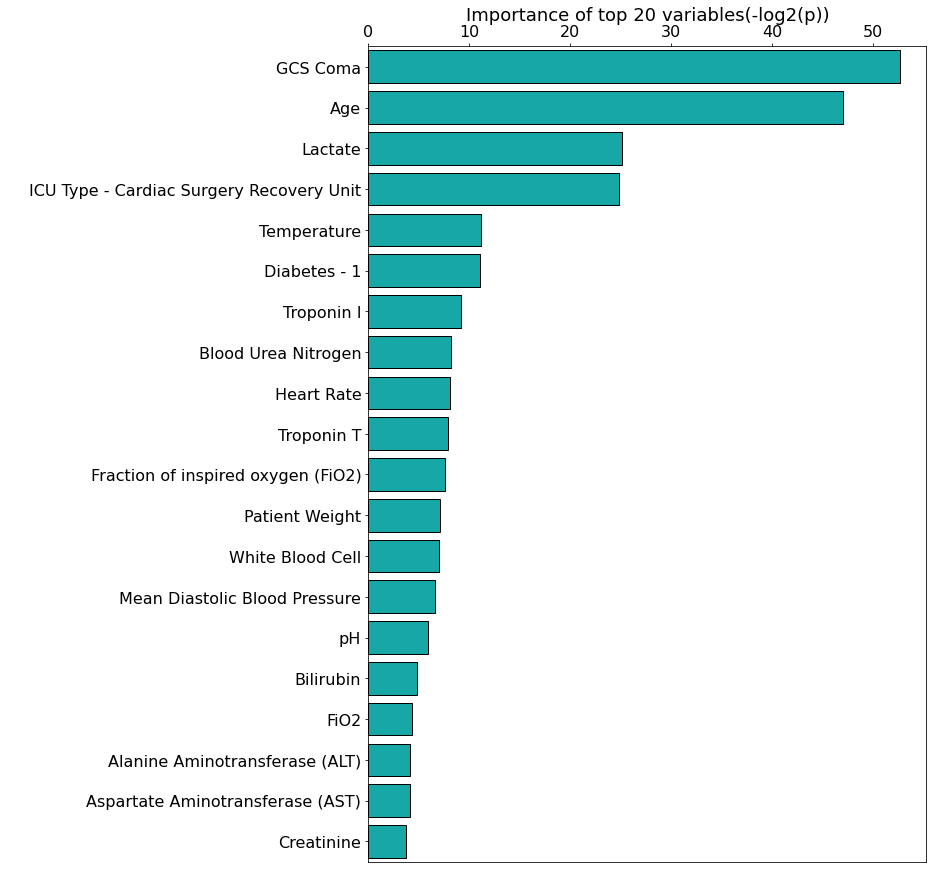

In [43]:
plt.figure(figsize=(10,15))
g=sns.barplot(x="-log2(p)",y="index",data=df_cph_varimp,color='c',edgecolor='black')
g.axes.xaxis.set_ticks_position("top")
g.axes.xaxis.set_label_position("top")
g.axes.set_yticklabels(['GCS Coma','Age','Lactate',
                        'ICU Type - Cardiac Surgery Recovery Unit',
                        'Temperature','Diabetes - 1', 'Troponin I',
                        'Blood Urea Nitrogen','Heart Rate','Troponin T',
                        'Fraction of inspired oxygen (FiO2)',
                        'Patient Weight',
                        'White Blood Cell',                    
                        'Mean Diastolic Blood Pressure',
                        'pH','Bilirubin', 'FiO2',
                        'Alanine Aminotransferase (ALT)',
                        'Aspartate Aminotransferase (AST)',
                        'Creatinine','Mech Vent'             
                       ])
plt.xlabel("Importance of top 20 variables(-log2(p))")
plt.ylabel(" ")

# Second try(Remove insig variables)

In [44]:
df_cph=df_cph[df_cph['p']<0.05]

In [45]:
cph_sig_cols=df_cph.index.tolist()
cph_sig_cols.append("Length_of_staymean")
cph_sig_cols.append("In-hospital_deathmax_1")

In [46]:
cph_sig=CoxPHFitter()
cph_sig.fit(df_train.loc[:,cph_sig_cols],"Length_of_staymean","In-hospital_deathmax_1")

<lifelines.CoxPHFitter: fitted with 3937 total observations, 3384 right-censored observations>

In [47]:
cph_sig.print_summary()

In [48]:
cph_sig.concordance_index_

0.7669966104060969

# Third try(Further remove insignificant variables)

In [49]:
cph_sig2=CoxPHFitter()
cph_sig2.fit(df_train.loc[:,cph_sig_cols].drop(["MeanDiasABPfirst","ALPmedian","TroponinTmedian","pHmedian"],axis=1),"Length_of_staymean","In-hospital_deathmax_1")

<lifelines.CoxPHFitter: fitted with 3937 total observations, 3384 right-censored observations>

In [50]:
cph_sig2.print_summary()

In [51]:
cph_sig2.summary.to_csv("cph_summary_A_last.csv")

In [52]:
cph_sig2.concordance_index_

0.7660246650758405

In [54]:
df_cph=cph_sig2.summary
df_cph_varimp =df_cph.reset_index()
df_cph_varimp=df_cph_varimp.loc[:,["index","-log2(p)"]]
df_cph_varimp=df_cph_varimp.sort_values(by="-log2(p)",ascending=False)
df_cph_varimp=df_cph_varimp.iloc[:20,:]
df_cph_varimp

index   -log2(p)
9           Agemean  65.179854
10        GCSComa_1  55.294736
12   ICUTypemax_2.0  40.030692
4     Lactatemedian  31.962211
0         BUNmedian  17.477226
1   Bilirubinmedian  11.850757
11       Diabetes_1  10.033254
3          HRmedian   9.980287
8   new_Weightfirst   9.877972
6         WBCmedian   8.290920
7    new_Tempmedian   7.354557
5   TroponinImedian   7.085610
2        FiO2median   6.098187

Text(0, 0.5, ' ')

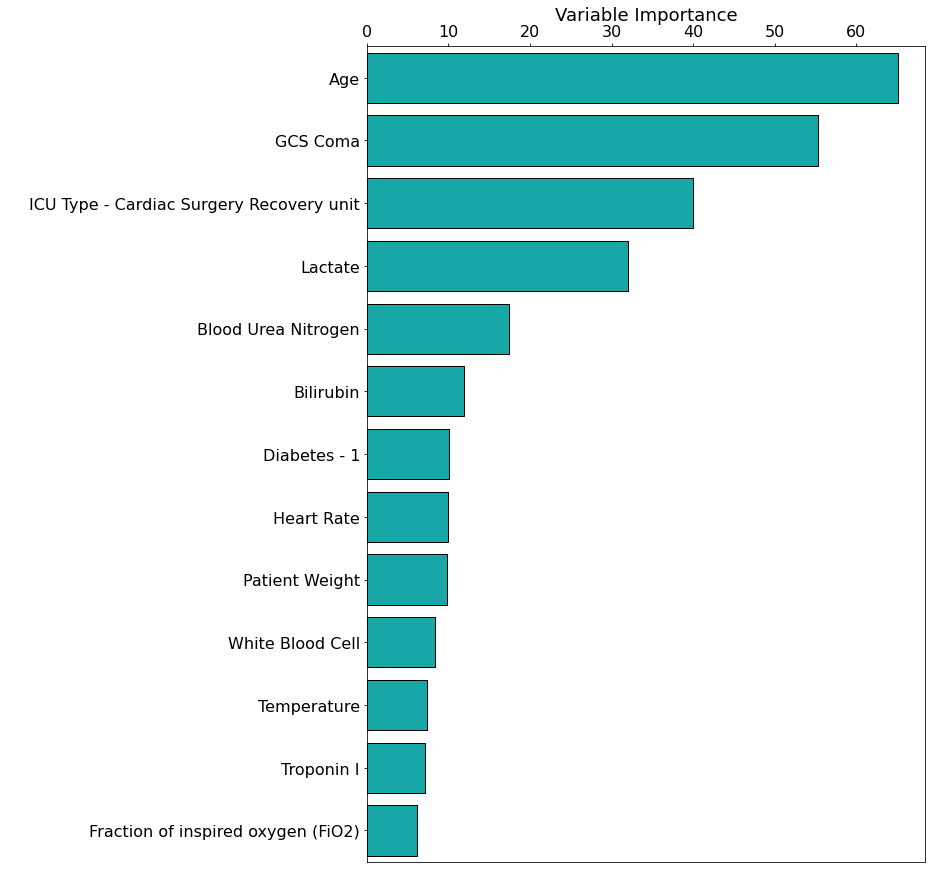

In [55]:
plt.figure(figsize=(10,15))
g=sns.barplot(x="-log2(p)",y="index",data=df_cph_varimp,color='c',edgecolor='black')
g.axes.xaxis.set_ticks_position("top")
g.axes.xaxis.set_label_position("top")
g.axes.set_yticklabels(['Age','GCS Coma',
                        'ICU Type - Cardiac Surgery Recovery unit',
                        'Lactate',
                        'Blood Urea Nitrogen', 'Bilirubin',
                        'Diabetes - 1', 
                        'Heart Rate',
                        'Patient Weight',
                        'White Blood Cell',                    
                        'Temperature',
                        'Troponin I',
                        'Fraction of inspired oxygen (FiO2)',            
                       ])
plt.xlabel("Variable Importance")
plt.ylabel(" ")

In [53]:
cph_sig2.predict_cumulative_hazard(df_test)

0         1         2         3         4         5         6     \
1.0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2.0    0.009037  0.003418  0.002474  0.005501  0.002330  0.005872  0.002725   
3.0    0.026971  0.010201  0.007383  0.016417  0.006953  0.017525  0.008133   
4.0    0.050298  0.019025  0.013768  0.030616  0.012967  0.032683  0.015168   
5.0    0.067334  0.025469  0.018432  0.040985  0.017358  0.043752  0.020305   
6.0    0.092234  0.034887  0.025247  0.056141  0.023777  0.059932  0.027814   
7.0    0.114013  0.043124  0.031209  0.069397  0.029392  0.074083  0.034382   
8.0    0.136772  0.051733  0.037439  0.083250  0.035259  0.088871  0.041245   
9.0    0.161171  0.060961  0.044117  0.098101  0.041549  0.104725  0.048603   
10.0   0.184722  0.069869  0.050564  0.112436  0.047620  0.120028  0.055705   
11.0   0.201802  0.076329  0.055239  0.122832  0.052023  0.131126  0.060856   
12.0   0.223924  0.084697  0.061295  0.136297  0.057726  0.145501  0.067527   
13.0   0.256928  0.097180  0.070329  0.156386  0.066234  0.166946  0.077480   
14.0   0.278575  0.105368  0.076255  0.169562  0.071815  0.181012  0.084008   
15.0   0.298042  0.112731  0.081583  0.181411  0.076833  0.193660  0.089878   
16.0   0.328938  0.124417  0.090040  0.200217  0.084798  0.213736  0.099195   
17.0   0.353738  0.133798  0.096829  0.215312  0.091191  0.229851  0.106674   
18.0   0.367485  0.138997  0.100592  0.223680  0.094735  0.238783  0.110819   
19.0   0.378115  0.143018  0.103502  0.230150  0.097476  0.245691  0.114025   
20.0   0.405664  0.153438  0.111043  0.246918  0.104577  0.263591  0.122333   
21.0   0.418120  0.158150  0.114452  0.254500  0.107789  0.271685  0.126089   
22.0   0.436904  0.165254  0.119594  0.265933  0.112631  0.283890  0.131753   
23.0   0.445640  0.168559  0.121985  0.271251  0.114883  0.289566  0.134388   
24.0   0.464613  0.175735  0.127179  0.282799  0.119774  0.301895  0.140109   
25.0   0.488714  0.184851  0.133776  0.297469  0.125987  0.317555  0.147377   
26.0   0.507716  0.192038  0.138978  0.309035  0.130886  0.329902  0.153108   
27.0   0.528611  0.199942  0.144697  0.321754  0.136273  0.343479  0.159409   
28.0   0.546409  0.206673  0.149569  0.332586  0.140861  0.355044  0.164776   
29.0   0.583967  0.220879  0.159850  0.355447  0.150543  0.379448  0.176102   
30.0   0.604901  0.228797  0.165580  0.368189  0.155940  0.393050  0.182415   
31.0   0.638738  0.241596  0.174842  0.388785  0.164662  0.415037  0.192619   
32.0   0.644815  0.243895  0.176506  0.392484  0.166229  0.418986  0.194451   
33.0   0.658385  0.249027  0.180220  0.400744  0.169728  0.427803  0.198544   
34.0   0.686780  0.259767  0.187993  0.418027  0.177047  0.446253  0.207106   
35.0   0.710179  0.268618  0.194398  0.432270  0.183080  0.461458  0.214163   
36.0   0.718616  0.271809  0.196707  0.437405  0.185254  0.466940  0.216707   
37.0   0.737073  0.278790  0.201760  0.448639  0.190013  0.478933  0.222273   
38.0   0.757555  0.286537  0.207366  0.461106  0.195293  0.492242  0.228449   
39.0   0.791344  0.299318  0.216615  0.481673  0.204003  0.514197  0.238639   
40.0   0.791344  0.299318  0.216615  0.481673  0.204003  0.514197  0.238639   
41.0   0.803777  0.304020  0.220019  0.489240  0.207209  0.522276  0.242388   
42.0   0.842963  0.318842  0.230745  0.513092  0.217310  0.547738  0.254205   
43.0   0.857568  0.324366  0.234743  0.521982  0.221076  0.557228  0.258610   
44.0   0.902746  0.341454  0.247109  0.549481  0.232722  0.586583  0.272233   
45.0   0.935536  0.353857  0.256085  0.569439  0.241175  0.607889  0.282122   
46.0   0.952598  0.360310  0.260755  0.579824  0.245574  0.618976  0.287267   
47.0   0.952598  0.360310  0.260755  0.579824  0.245574  0.618976  0.287267   
48.0   0.971094  0.367306  0.265818  0.591082  0.250342  0.630994  0.292844   
49.0   0.990876  0.374789  0.271233  0.603123  0.255441  0.643848  0.298810   
50.0   0.990876  0.374789  0.271233  0.603123  0.255441  0.64

Remove Hypoglycemia_1 for the purpose of plotting(model is called cph2)

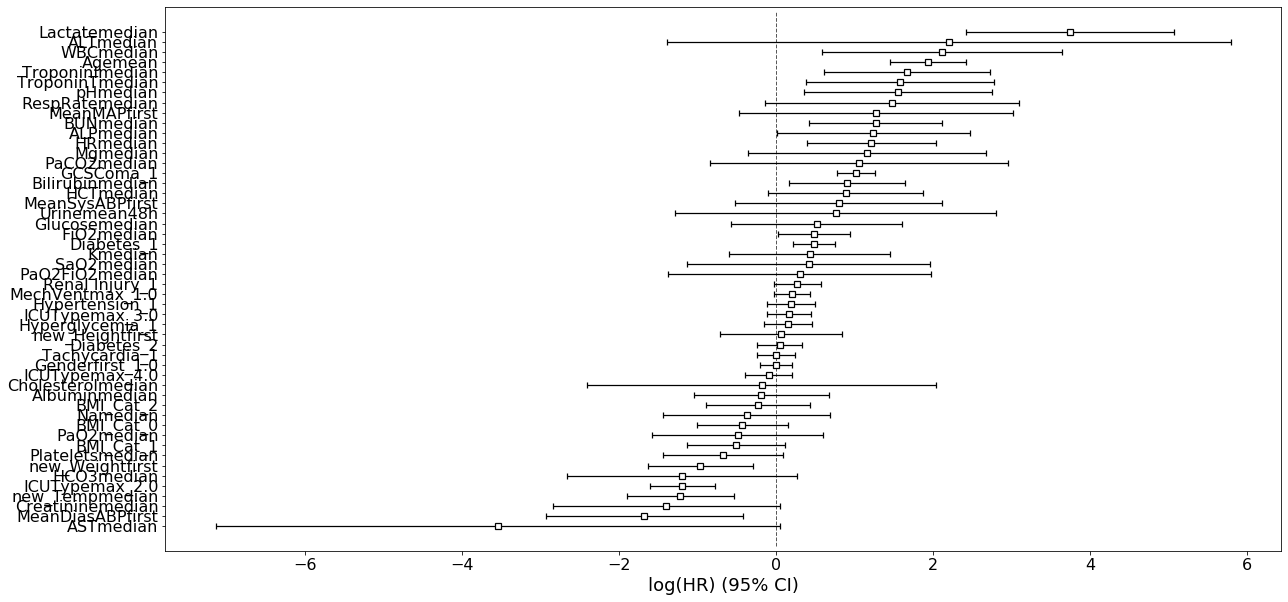

In [62]:
plt.figure(figsize=(20,10))
cph2 = CoxPHFitter()
cph2.fit(df_train.drop("Hypoglycemia_1",axis=1),"Length_of_staymean","In-hospital_deathmax_1")
cph2.plot()

In [63]:
cph_sig2.variance_matrix_

BUNmedian  Bilirubinmedian  FiO2median  HRmedian  \
BUNmedian         0.082043        -0.020736    0.000787  0.007163   
Bilirubinmedian  -0.020736         0.121683   -0.001269  0.003491   
FiO2median        0.000787        -0.001269    0.048689 -0.010177   
HRmedian          0.007163         0.003491   -0.010177  0.113238   
Lactatemedian     0.013749        -0.022828   -0.007835 -0.027572   
TroponinImedian  -0.004059        -0.003115   -0.001940  0.009043   
WBCmedian        -0.035075        -0.000867   -0.001758 -0.012407   
new_Tempmedian    0.022411         0.011861    0.004713 -0.018964   
new_Weightfirst  -0.017739         0.002935   -0.005457  0.001530   
Agemean          -0.008185         0.011839   -0.000901  0.013701   
GCSComa_1        -0.002425         0.000766    0.002038  0.002093   
Diabetes_1       -0.000804         0.003108   -0.000047  0.001123   
ICUTypemax_2.0    0.005126         0.002246    0.000380  0.002642   

                 Lactatemedian  TroponinImedian  WBCmedian  new_Tempmedian  \
BUNmedian             0.013749        -0.004059  -0.035075        0.022411   
Bilirubinmedian      -0.022828        -0.003115  -0.000867        0.011861   
FiO2median           -0.007835        -0.001940  -0.001758        0.004713   
HRmedian             -0.027572         0.009043  -0.012407       -0.018964   
Lactatemedian         0.251261         0.004750  -0.008838        0.043569   
TroponinImedian       0.004750         0.269735   0.023969       -0.004670   
WBCmedian            -0.008838         0.023969   0.481654       -0.009346   
new_Tempmedian        0.043569        -0.004670  -0.009346        0.103642   
new_Weightfirst      -0.001331         0.001105   0.003912       -0.008176   
Agemean               0.006650        -0.003794  -0.005248        0.004964   
GCSComa_1            -0.019726         0.001560  -0.004689       -0.004212   
Diabetes_1           -0.000380         0.000349   0.004534       -0.001812   
ICUTypemax_2.0       -0.006257         0.001401  -0.003502       -0.001472   

                 new_Weightfirst   Agemean  GCSComa_1  Diabetes_1  \
BUNmedian              -0.017739 -0.008185  -0.002425   -0.000804   
Bilirubinmedian         0.002935  0.011839   0.000766    0.003108   
FiO2median             -0.005457 -0.000901   0.002038   -0.000047   
HRmedian                0.001530  0.013701   0.002093    0.001123   
Lactatemedian          -0.001331  0.006650  -0.019726   -0.000380   
TroponinImedian         0.001105 -0.003794   0.001560    0.000349   
WBCmedian               0.003912 -0.005248  -0.004689    0.004534   
new_Tempmedian         -0.008176  0.004964  -0.004212   -0.001812   
new_Weightfirst         0.070440  0.012345  -0.000851   -0.000331   
Agemean                 0.012345  0.052464   0.002822    0.000564   
GCSComa_1              -0.000851  0.002822   0.013784   -0.000052   
Diabetes_1             -0.000331  0.000564  -0.000052    0.015837   
ICUTypemax_2.0          0.000492 -0.002632  -0.000283   -0.000219   

                 ICUTypemax_2.0  
BUNmedian              0.005126  
Bilirubinmedian        0.002246  
FiO2median             0.000380  
HRmedian               0.002642  
Lactatemedian         -0.006257  
TroponinImedian        0.001401  
WBCmedian             -0.003502  
new_Tempmedian        -0.001472  
new_Weightfirst        0.000492  
Agemean               -0.002632  
GCSComa_1             -0.000283  
Diabetes_1            -0.000219  
ICUTypemax_2.0         0.026730

In [64]:
print(cph.log_likelihood_)
print(cph_sig.log_likelihood_)
print(cph_sig2.log_likelihood_)
print("\n")
print(cph.concordance_index_)
print(cph_sig.concordance_index_)
print(cph_sig2.concordance_index_)

-3778.744409539053
-3807.1601024995734
-3810.434136860252


0.77579297738962
0.7669966104060969
0.7660246650758405


In [65]:
df_train.shape

(3937, 53)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.





1. Variable 'GCSComa_1' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['GCSComa_1', ...]` in the
call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



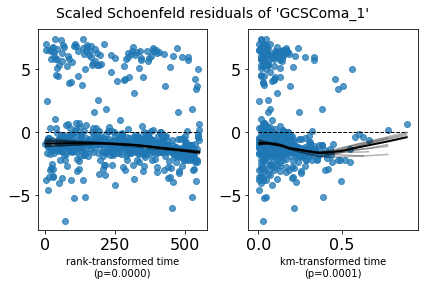

In [66]:
cph_sig2.check_assumptions(df_train.loc[:,cph_sig_cols].drop(["MeanDiasABPfirst","ALPmedian","TroponinTmedian","pHmedian"],axis=1),show_plots=True)

In [67]:
cph_sig2.log_likelihood_ratio_test() 

<lifelines.StatisticalResult: None>

#  Predict(Train)

In [68]:
from lifelines.utils import median_survival_times,qth_survival_times

In [69]:
train_pred = cph_sig2.predict_survival_function(df_train)

In [70]:
train_pred_50 = median_survival_times(train_pred);train_pred_50
train_pred_90  = qth_survival_times(.90, train_pred)

In [71]:
df_train_pred_days=train_pred_90.T.join(df_train)
df_train_pred_days.head()

0.9  ALPmedian  ALTmedian  ASTmedian  Albuminmedian  BUNmedian  \
0  28.0   0.044325   0.002832   0.002552       0.452381   0.048711   
1  37.0   0.044325   0.002832   0.002552       0.452381   0.091691   
2  13.0   0.069846   0.008091   0.012345       0.333333   0.005731   
3  14.0   0.062458   0.000910   0.000574       0.785714   0.103152   
4   9.0   0.044325   0.002832   0.002552       0.523810   0.189112   

   Bilirubinmedian  Cholesterolmedian  Creatininemedian  FiO2median  \
0         0.013100           0.413907          0.034591    0.305556   
1         0.013100           0.413907          0.062893    0.305556   
2         0.061135           0.413907          0.006289    0.305556   
3         0.002183           0.413907          0.031447    0.305556   
4         0.013100           0.413907          0.050314    0.305556   

   Glucosemedian  HCO3median  HCTmedian  HRmedian   Kmedian  Lactatemedian  \
0       0.252273    0.487179   0.404324  0.277311  0.333333       0.057732   
1       0.173864    0.358974   0.302703  0.336134  0.274510       0.057732   
2       0.209091    0.435897   0.300541  0.369748  0.176471       0.037113   
3       0.154545    0.512821   0.475676  0.285714  0.294118       0.057732   
4       0.121591    0.282051   0.341622  0.277311  0.274510       0.057732   

   Mgmedian  Namedian  PaCO2median  PaO2median  Plateletsmedian  \
0  0.111111  0.450450     0.294118    0.200422         0.211019   
1  0.185185  0.459459     0.305882    0.267932         0.186777   
2  0.129630  0.477477     0.258824    0.199367         0.079890   
3  0.185185  0.513514     0.294118    0.200422         0.334435   
4  0.083333  0.504505     0.294118    0.200422         0.100826   

   RespRatemedian  SaO2median  TroponinImedian  TroponinTmedian  WBCmedian  \
0        0.388889    0.958333          0.03681          0.00541   0.072495   
1        0.416667    0.950000          0.03681          0.00541   0.092395   
2        0.416667    0.916667          0.03681          0.00541   0.029140   
3        0.333333    0.958333          0.03681          0.00541   0.061834   
4        0.416667    0.958333          0.03681          0.00541   0.029851   

   pHmedian  new_Tempmedian  PaO2FiO2median  new_Heightfirst  new_Weightfirst  \
0  0.542857          0.6250        0.242489         0.500894         0.431500   
1  0.561905          0.5500        0.242489         0.592129         0.412861   
2  0.752381          0.6625        0.242489         0.500894         0.232992   
3  0.542857          0.3000        0.242489         0.681574         0.493010   
4  0.542857          0.4500        0.242489         0.500894         0.431500   

   Urinemean48h  MeanMAPfirst  MeanDiasABPfirst  MeanSysABPfirst  \
0      0.005457      0.269312          0.385714         0.539906   
1      0.005383      0.167264          0.296429         0.265258   
2      0.004437      0.310326          0.510714         0.509390   
3      0.002837      0.248804          0.371429         0.478873   
4      0.002045      0.207717          0.214286         0.525822   

   Length_of_staymean   Agemean  In-hospital_deathmax_1  Hypertension_1  \
0                   5  0.520000                       0               1   
1                   8  0.813333                       0               0   
2                  19  0.386667                       0               1   
3                   9  0.706667                       0               0   
4                   4  0.973333                       0               1   

   Tachycardia_1  GCSComa_1  Diabetes_1  Diabetes_2  Hyperglycemia_1  \
0              0          0           0           1                0   
1              0          0           0           0                0   
2              1          1           0           0                0   
3              0          0           0           0                0   
4              0          0           0           0                0   

   Hypoglycemia_1  Renal Injury_1  

In [72]:
df_train_pred_days.shape

(3937, 54)

Text(0.5, 0, 'Length of Stay')

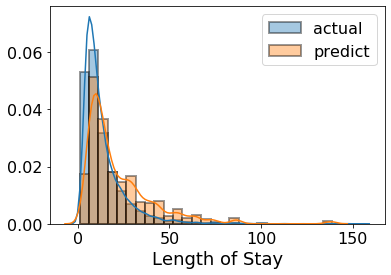

In [73]:
bins=np.histogram((df_train['Length_of_staymean']), bins=30)[1]
sns.distplot(df_train.Length_of_staymean,label='actual', hist_kws=dict(edgecolor="k", linewidth=2), bins = bins)
sns.distplot(df_train_pred_days[0.90][~df_train_pred_days[0.90].isin([np.inf])],label='predict',hist_kws=dict(edgecolor="k", linewidth=2), bins = bins)
plt.legend()
plt.xlabel("Length of Stay")

# Predict(Test)

In [74]:
test_pred=cph_sig2.predict_survival_function(df_test)

In [ ]:
test_pred

In [77]:
test_pred.index

Float64Index([  1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
               10.0,  11.0,  12.0,  13.0,  14.0,  15.0,  16.0,  17.0,  18.0,
               19.0,  20.0,  21.0,  22.0,  23.0,  24.0,  25.0,  26.0,  27.0,
               28.0,  29.0,  30.0,  31.0,  32.0,  33.0,  34.0,  35.0,  36.0,
               37.0,  38.0,  39.0,  40.0,  41.0,  42.0,  43.0,  44.0,  45.0,
               46.0,  47.0,  48.0,  49.0,  50.0,  51.0,  52.0,  53.0,  54.0,
               55.0,  56.0,  57.0,  58.0,  60.0,  61.0,  64.0,  65.0,  66.0,
               68.0,  70.0,  72.0,  74.0,  76.0,  79.0,  84.0,  85.0,  86.0,
               87.0,  89.0,  92.0,  94.0,  99.0, 101.0, 112.0, 121.0, 138.0,
              146.0, 154.0],
             dtype='float64')

Text(0.5, 0, 'Time in days')

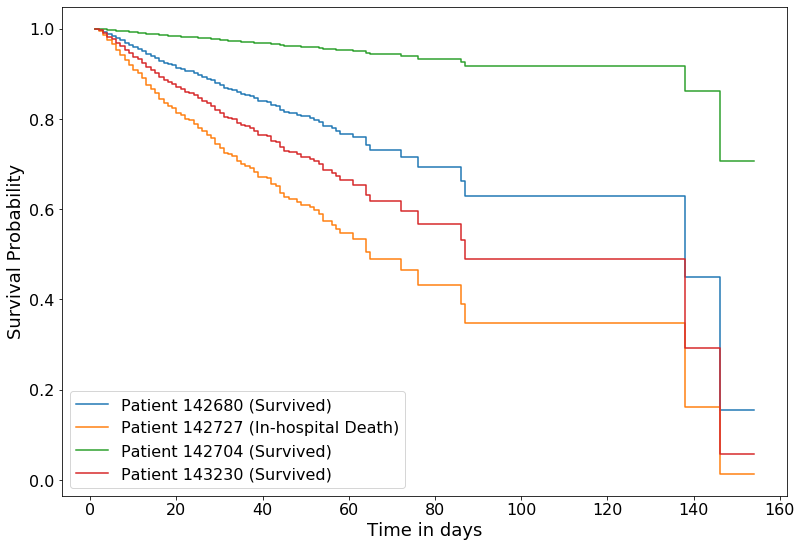

In [78]:
plt.figure(figsize=(13,9))
plt.step(test_pred.index, test_pred[2], where="post", label='Patient 142680 (Survived)')
plt.step(test_pred.index, test_pred[26], where="post", label='Patient 142727 (In-hospital Death)')
plt.step(test_pred.index, test_pred[14], where="post", label='Patient 142704 (Survived)')
plt.step(test_pred.index, test_pred[208], where="post", label='Patient 143230 (Survived)')
plt.legend()
plt.ylabel("Survival Probability")
plt.xlabel("Time in days")

In [79]:
# test_pred_50 = median_survival_times(test_pred);test_pred_50
test_pred_90  = qth_survival_times(.9, test_pred)

In [80]:
df_test_pred_days=test_pred_90.T.join(df_test)
df_test_pred_days.head()

0.9  ALPmedian  ALTmedian  ASTmedian  Albuminmedian  BUNmedian  \
0   9.0   0.007564   0.009015   0.076039       0.210526   0.071429   
1  31.0   0.048979   0.002404   0.003501       0.447368   0.148352   
2  25.0   0.048411   0.003907   0.001845       0.447368   0.120879   
3  13.0   0.023449   0.074998   0.099508       0.289474   0.071429   
4  37.0   0.048979   0.002404   0.003501       0.447368   0.098901   

   Bilirubinmedian  Cholesterolmedian  Creatininemedian  FiO2median  \
0         0.041441               0.36          0.063291    1.000000   
1         0.012613               0.36          0.018987    0.367089   
2         0.012613               0.36          0.037975    0.367089   
3         0.022523               0.36          0.082278    0.620253   
4         0.012613               0.36          0.044304    0.620253   

   Glucosemedian  HCO3median  HCTmedian  HRmedian   Kmedian  Lactatemedian  \
0       0.248018    0.302326   0.520581  0.232653  0.414286       0.190981   
1       0.322763    0.151163   0.552058  0.453061  0.214286       0.074271   
2       0.192525    0.511628   0.670702  0.436735  0.400000       0.074271   
3       0.291053    0.255814   0.443099  0.330612  0.585714       0.169761   
4       0.220838    0.453488   0.598063  0.546939  0.371429       0.074271   

   Mgmedian  Namedian  PaCO2median  PaO2median  Plateletsmedian  \
0  0.200000  0.586957     0.341772    0.444712         0.058562   
1  0.161538  0.663043     0.341772    0.230769         0.449919   
2  0.161538  0.500000     0.569620    0.103365         0.172456   
3  0.138462  0.532609     0.379747    0.237981         0.060985   
4  0.153846  0.608696     0.481013    0.103365         0.145396   

   RespRatemedian  SaO2median  TroponinImedian  TroponinTmedian  WBCmedian  \
0        0.307692    0.967213         0.048283         0.004795   0.019583   
1        0.230769    0.959016         0.048283         0.004795   0.058436   
2        0.307692    0.885246         0.048283         0.004795   0.045120   
3        0.307692    0.877049         0.048283         0.004795   0.063763   
4        0.346154    0.959016         0.048283         0.004795   0.044337   

   pHmedian  new_Tempmedian  PaO2FiO2median  new_Heightfirst  new_Weightfirst  \
0  0.560748        0.371429        0.167470         0.592129         0.521822   
1  0.579439        0.400000        0.213253         0.500894         0.453510   
2  0.691589        0.771429        0.213253         0.728086         0.462998   
3  0.429907        0.542857        0.213253         0.681574         0.561055   
4  0.542056        0.700000        0.213253         0.545617         0.569260   

   Urinemean48h  MeanMAPfirst  MeanDiasABPfirst  MeanSysABPfirst  \
0      0.021675      0.310663          0.376147         0.334862   
1      0.006186      0.318765          0.293578         0.454128   
2      0.007665      0.305577          0.389908         0.341743   
3      0.007952      0.347212          0.522936         0.486239   
4      0.004304      0.305577          0.366972         0.383028   

   Length_of_staymean   Agemean  In-hospital_deathmax_1  Hypertension_1  \
0                   9  0.729730                       1               0   
1                  31  0.554054                       0               0   
2                  17  0.594595                       1               0   
3                  17  0.648649                       0               0   
4                   9  0.472973                       0               0   

   Tachypnea_1  Tachycardia_1  GCSComa_1  Diabetes_1  Diabetes_2  \
0            0              0          1           1           0   
1            1              1          0           0           1   
2            0              1          0           0           0   
3            0              0          1           1           0   
4            1              1          0           0           0   

   Hyperglycemia_1  Hypoglycemia_1  Renal Injury_1  BMI_Cat

Text(0.5, 0, 'Length of Stay')

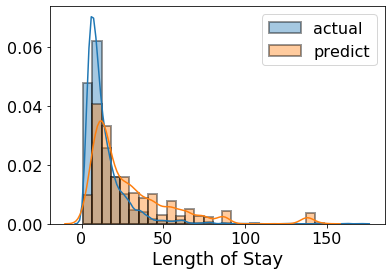

In [81]:
bins=np.histogram((df_test['Length_of_staymean']), bins=30)[1]

sns.distplot(df_test.Length_of_staymean,label='actual', hist_kws=dict(edgecolor="k", linewidth=2), bins = bins)
sns.distplot(df_test_pred_days[0.9][~df_test_pred_days[0.9].isin([np.inf])],label='predict', hist_kws=dict(edgecolor="k", linewidth=2), bins = bins)
plt.legend()
plt.xlabel("Length of Stay")

# Plot the RSF and CPH median survival times

In [82]:
test_pred_50 = median_survival_times(test_pred)
df_test_pred_days=test_pred_50.T.join(df_test)
df_test_pred_days=df_test_pred_days.loc[:,[0.5,"In-hospital_deathmax_1"]]
df_test_pred_days=df_test_pred_days.reset_index()

In [83]:
df_test_pred_days.rename(columns={"index":"Patient_Index",0.5:"cph_Time"},inplace=True)

In [84]:
df_test_pred_days.columns

Index(['Patient_Index', 'cph_Time', 'In-hospital_deathmax_1'], dtype='object')

In [85]:
df_test_pred_days.shape

(3941, 3)

In [86]:
df_test_pred_days["cph_Time"].value_counts().head()

146.0    1070
138.0     797
inf       382
87.0      197
86.0      191
Name: cph_Time, dtype: int64

In [87]:
rsf_pred_days = pd.read_csv("RSF_Median_SurvFunc1.csv")
rsf_pred_days.shape

(3941, 4)

In [88]:
rsf_pred_days

Time  Patient  In-hospital_deathmax  Patient_Index
0     146.0   142675                     1              0
1     146.0   142676                     0              1
2       NaN   142680                     1              2
3      65.0   142683                     0              3
4       NaN   142688                     0              4
...     ...      ...                   ...            ...
3936    NaN   152849                     0           3990
3937   25.0   152851                     0           3991
3938  138.0   152858                     0           3992
3939    NaN   152862                     0           3993
3940    NaN   152864                     0           3994

[3941 rows x 4 columns]

In [89]:
rsf_pred_days["Time"].value_counts().head()

138.0    99
146.0    91
31.0     80
72.0     80
57.0     77
Name: Time, dtype: int64

In [90]:
# Merge RSF and CPH length of stay predictions

In [91]:
rsf_cph_median=pd.merge(rsf_pred_days,df_test_pred_days,how="left",on="Patient_Index")

In [92]:
rsf_cph_median

Time  Patient  In-hospital_deathmax  Patient_Index  cph_Time  \
0     146.0   142675                     1              0      51.0   
1     146.0   142676                     0              1     146.0   
2       NaN   142680                     1              2     138.0   
3      65.0   142683                     0              3      76.0   
4       NaN   142688                     0              4     146.0   
...     ...      ...                   ...            ...       ...   
3936    NaN   152849                     0           3990     146.0   
3937   25.0   152851                     0           3991      29.0   
3938  138.0   152858                     0           3992       inf   
3939    NaN   152862                     0           3993      64.0   
3940    NaN   152864                     0           3994     138.0   

      In-hospital_deathmax_1  
0                          1  
1                          0  
2                          1  
3                          0  
4                          0  
...                      ...  
3936                       0  
3937                       0  
3938                       0  
3939                       0  
3940                       0  

[3941 rows x 6 columns]

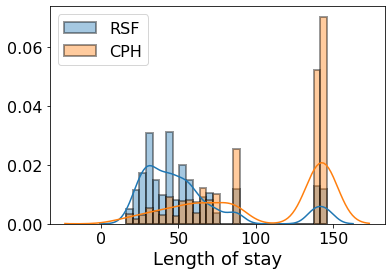

In [93]:
a = rsf_cph_median['Time'].dropna(axis = 0)
bins=np.histogram((a), bins=30)[1]
sns.distplot(rsf_cph_median['Time'],label='RSF', bins = bins, hist_kws=dict(edgecolor="k", linewidth=2))
sns.distplot(rsf_cph_median['cph_Time'][~rsf_cph_median['cph_Time'].isin([np.inf])],label='CPH', bins = bins, hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel("Length of stay")
plt.legend()

Exploring those with infinite cph_time

In [94]:
df_test_pred_days[df_test_pred_days["cph_Time"]==np.inf].count()

Patient_Index             382
cph_Time                  382
In-hospital_deathmax_1    382
dtype: int64

In [95]:
df_B.iloc[df_test_pred_days[df_test_pred_days["cph_Time"]==np.inf]['Patient_Index'],]

Patient  ALPmedian  ALTmedian  ASTmedian  Albuminmedian  BUNmedian  \
14     142704   0.046899   0.001631   0.000852       0.552632   0.043956   
29     142732   0.041604   0.001975   0.001136       0.447368   0.065934   
31     142736   0.037065   0.007298   0.012302       0.447368   0.104396   
39     142772   0.048979   0.002404   0.003501       0.447368   0.112637   
46     142789   0.048979   0.002404   0.003501       0.447368   0.076923   
49     142794   0.048979   0.002404   0.003501       0.447368   0.065934   
54     142812   0.048979   0.002404   0.003501       0.447368   0.087912   
60     142831   0.048979   0.002404   0.003501       0.447368   0.024725   
69     142851   0.023449   0.001245   0.007618       0.157895   0.049451   
77     142864   0.048979   0.002404   0.003501       0.447368   0.076923   
83     142872   0.048979   0.002404   0.003501       0.447368   0.049451   
106    142941   0.048979   0.002404   0.003501       0.447368   0.082418   
111    142951   0.031014   0.001030   0.000331       0.447368   0.041209   
119    142976   0.048979   0.002404   0.003501       0.447368   0.068681   
124    142992   0.065809   0.001803   0.002082       0.736842   0.071429   
128    142998   0.048979   0.002404   0.003501       0.447368   0.098901   
129    143000   0.048979   0.002404   0.003501       0.447368   0.065934   
173    143106   0.048979   0.002404   0.003501       0.447368   0.071429   
181    143137   0.048979   0.001717   0.004732       0.447368   0.076923   
244    143293   0.053707   0.076758   0.053184       0.736842   0.060440   
249    143305   0.019667   0.019576   0.021482       0.394737   0.082418   
258    143320   0.048979   0.002404   0.003501       0.447368   0.049451   
259    143325   0.048979   0.002404   0.003501       0.447368   0.076923   
274    143359   0.048979   0.002404   0.003501       0.447368   0.057692   
298    143411   0.048979   0.002404   0.003501       0.447368   0.060440   
312    143450   0.048979   0.002404   0.003501       0.447368   0.098901   
326    143471   0.048979   0.002404   0.003501       0.342105   0.101648   
332    143485   0.048979   0.002404   0.003501       0.657895   0.024725   
342    143514   0.048979   0.002404   0.003501       0.447368   0.178571   
355    143544   0.048979   0.002404   0.003501       0.447368   0.093407   
356    143548   0.048979   0.002404   0.003501       0.447368   0.046703   
365    143571   0.048979   0.002404   0.003501       0.447368   0.052198   
384    143626   0.048979   0.002404   0.003501       0.447368   0.038462   
386    143632   0.048979   0.002404   0.003501       0.447368   0.186813   
400    143662   0.029501   0.002232   0.008044       0.447368   0.109890   
411    143679   0.048979   0.002404   0.003501       0.447368   0.115385   
422    143709   0.048979   0.002404   0.003501       0.447368   0.082418   
433    143740   0.048979   0.002404   0.003501       0.447368   0.096154   
451    143788   0.048979   0.002404   0.003501       0.447368   0.071429   
459    143809   0.048979   0.002404   0.003501       0.447368   0.192308   
467    143840   0.048979   0.002404   0.003501       0.421053   0.027473   
508    143943   0.031770   0.001116   0.000946       0.710526   0.107143   
510    143947   0.048979   0.002404   0.003501       0.447368   0.065934   
522    143988   0.031014   0.000687   0.003312       0.526316   0.115385   
528    144008   0.029501   0.001889   0.000662       0.500000   0.093407   
536    144022   0.048979   0.002404   0.003501       0.447368   0.109890   
537    144024   0.048979   0.002404   0.003501       0.973684   0.082418   
542    144036   0.048979   0.002404   0.003501       0.447368   0.041209   
549    144052   0.048979   0.002404   0.003501       0.447368   0.071429   
563    144077   0.048979   0.002404   0.003501       0.447368   0.068681   
570    144093   0.019667   0.002490   0.001041       0.473684   0.076923   
575    144102   0.048979   0.002404   0.003501       0

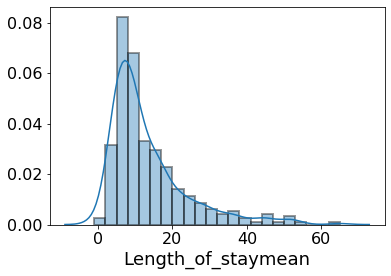

In [96]:
sns.distplot(df.iloc[df_test_pred_days[df_test_pred_days["cph_Time"]==np.inf]['Patient_Index']]['Length_of_staymean'], hist_kws=dict(edgecolor="k", linewidth=2))

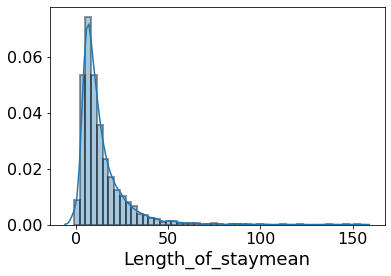

In [97]:
sns.distplot(df['Length_of_staymean'], hist_kws=dict(edgecolor="k", linewidth=2))

# Accuracy and Calibration

Text(0.5, 1.0, 'Calibration plots (reliability curve)')

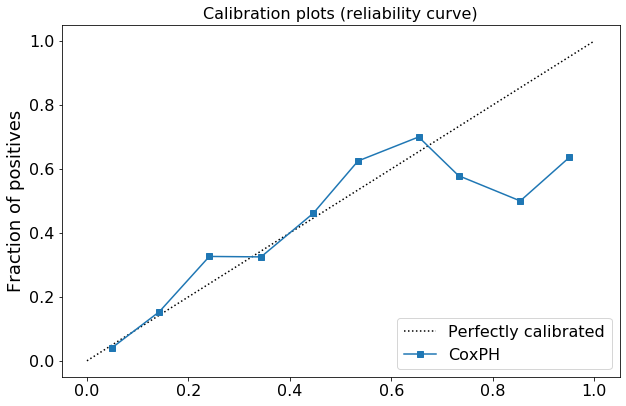

In [98]:
import numpy as np
from sklearn.calibration import calibration_curve 
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2) 
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") 
probs = 1-np.array(cph.predict_survival_function(df_test).loc[13])
actual = df_test['In-hospital_deathmax_1'] 
fraction_of_positives, mean_predicted_value = calibration_curve(actual, probs, n_bins=10, normalize=False) 
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ("CoxPH",))
ax1.set_ylabel("Fraction of positives") 
ax1.set_ylim([-0.05, 1.05]) 
ax1.legend(loc="lower right") 
ax1.set_title('Calibration plots (reliability curve)')

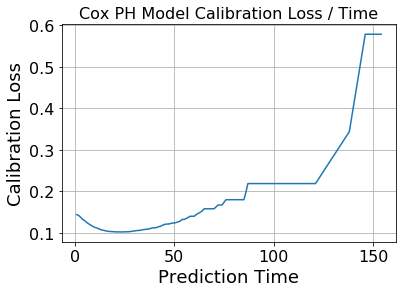

In [99]:
from sklearn.metrics import brier_score_loss 
loss_dict = {} 
for i in train_pred.index.unique(): 
    score = brier_score_loss(df_test['In-hospital_deathmax_1'],1 - np.array(cph_sig2.predict_survival_function(df_test).loc[i]),pos_label=1) 
    loss_dict[i] = [score] 
loss_df = pd.DataFrame(loss_dict).T 
fig, ax = plt.subplots() 
ax.plot(loss_df.index, loss_df) 
ax.set(xlabel='Prediction Time', ylabel='Calibration Loss', title='Cox PH Model Calibration Loss / Time') 
ax.grid() 
plt.show()

# Well calibrated between 10 and 25 days and then proceeds to get less and less so as we start to predict further out.